# Cardio Vascular Disease Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

### Loding Dataset

In [4]:
df=pd.read_csv('CVD_cleaned.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,m,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


### Data Cleaning

In [6]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [7]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,m,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160,81.19,31.71,No,1,5,12,1


In [8]:
df.shape

(308854, 19)

In [9]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [11]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [12]:
df.duplicated().sum()

80

###Visualisation

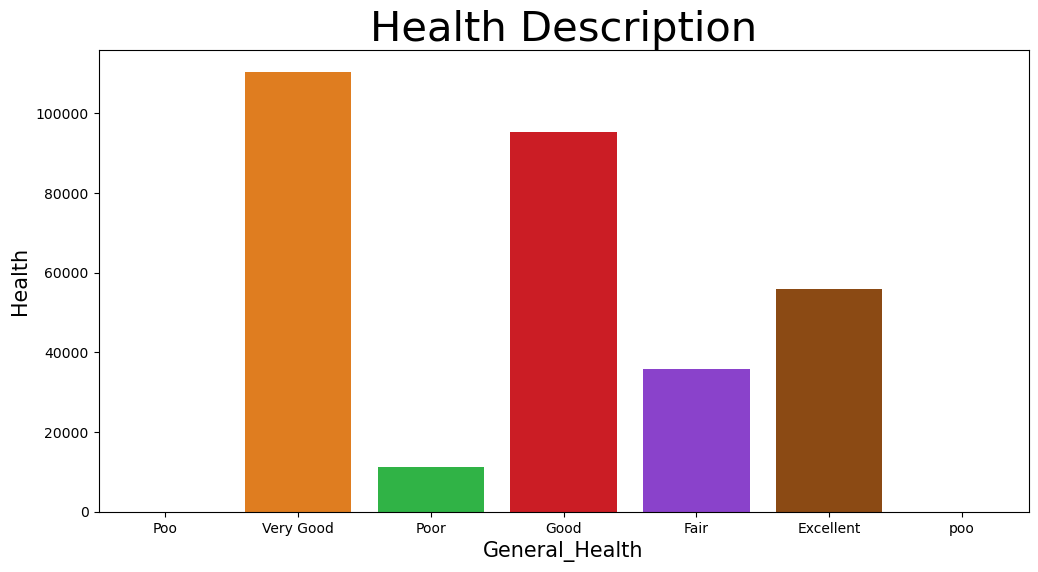

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='General_Health', hue="General_Health",palette='bright')
plt.title('Health Description', fontsize=30)
plt.xlabel('General_Health', fontsize=15)
plt.ylabel('Health', fontsize=15)
plt.show()

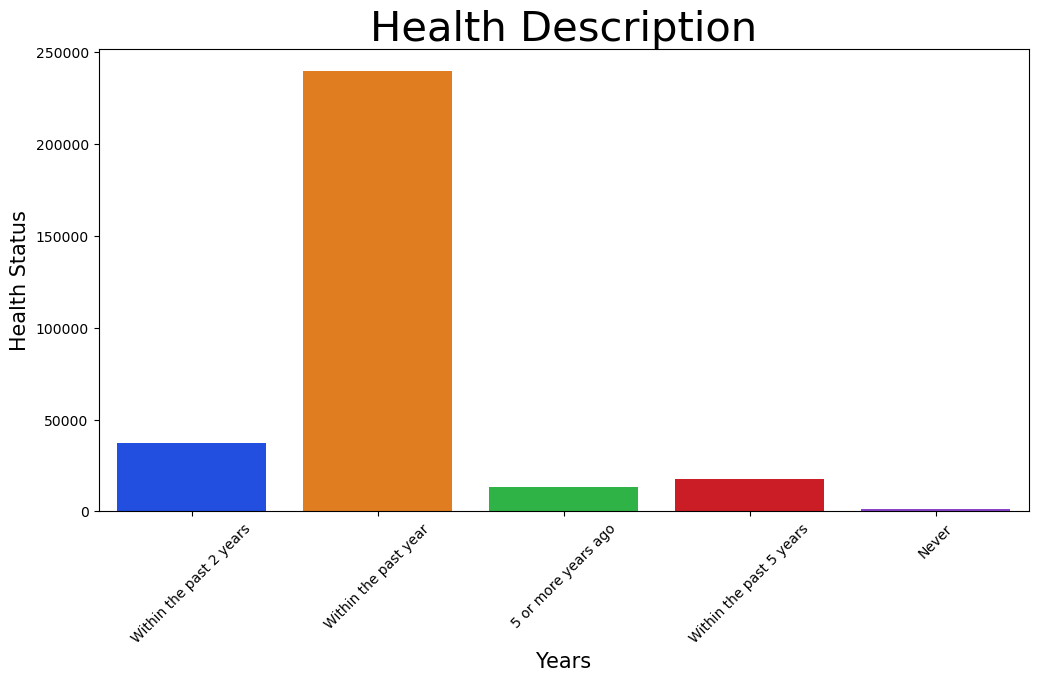

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Checkup', hue="Checkup",palette='bright')
plt.title('Health Description', fontsize=30)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Health Status', fontsize=15)
plt.xticks(rotation=45)
plt.show()

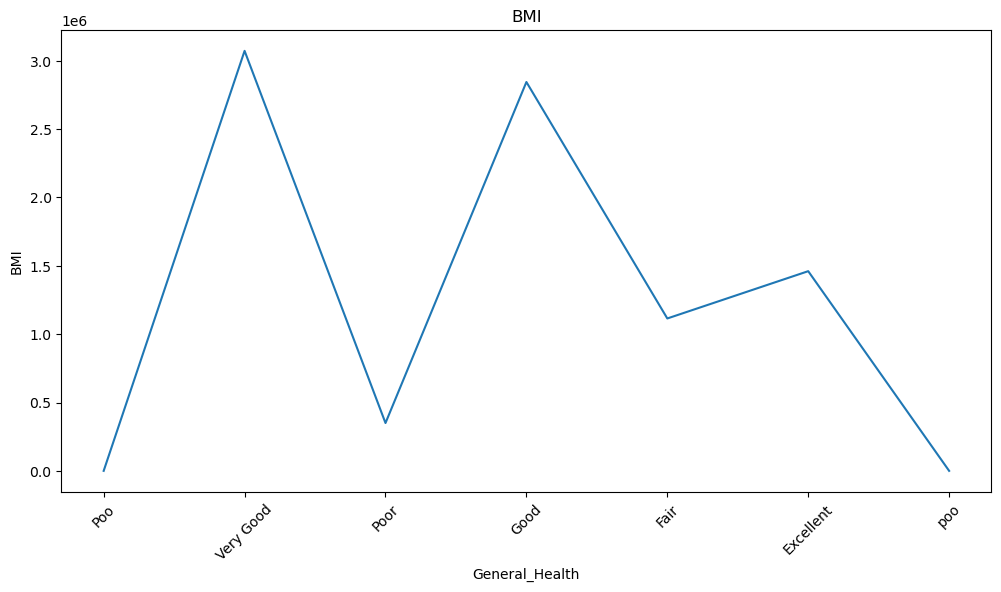

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='General_Health', y='BMI', estimator='sum', ci=None)
plt.title('BMI')
plt.xlabel('General_Health')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

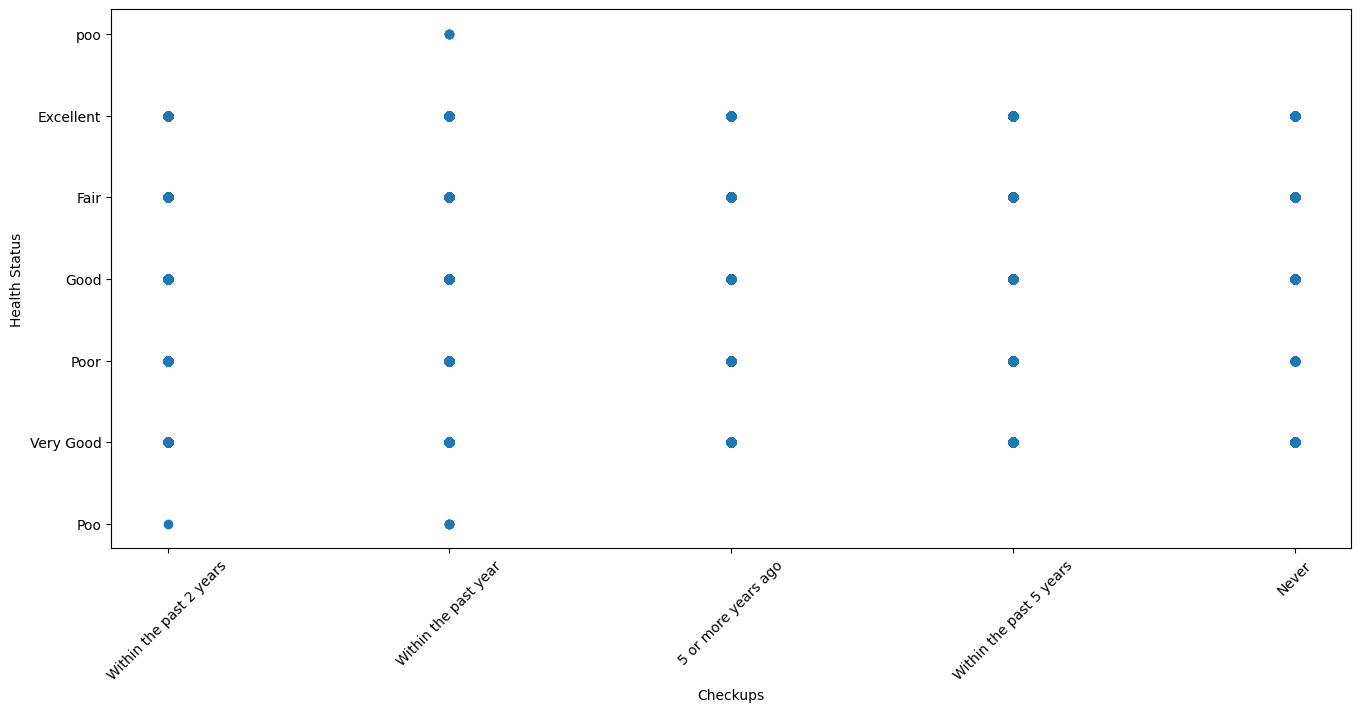

In [18]:
plt.figure(figsize=(16,7))
plt.scatter(x=df['Checkup'],y=df['General_Health'])
plt.xlabel('Checkups')
plt.ylabel('Health Status')
plt.xticks(rotation=45)
plt.show()

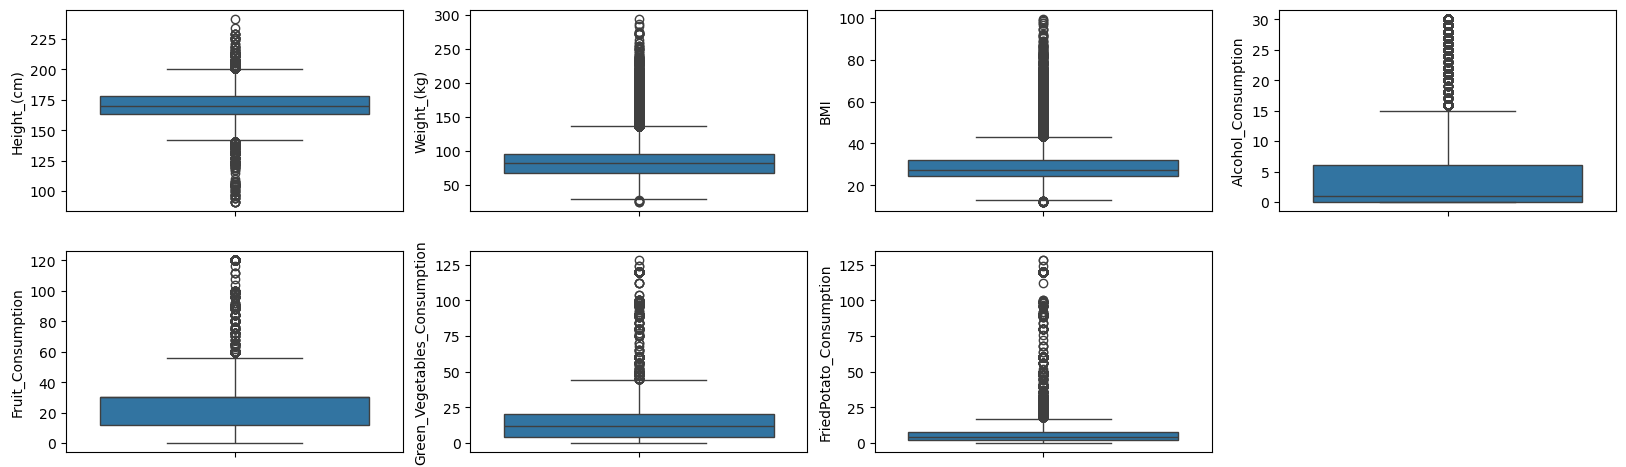

In [19]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(df.select_dtypes(include='number'),1):
    plt.subplot(4,4,i)
    sns.boxplot(df[column])

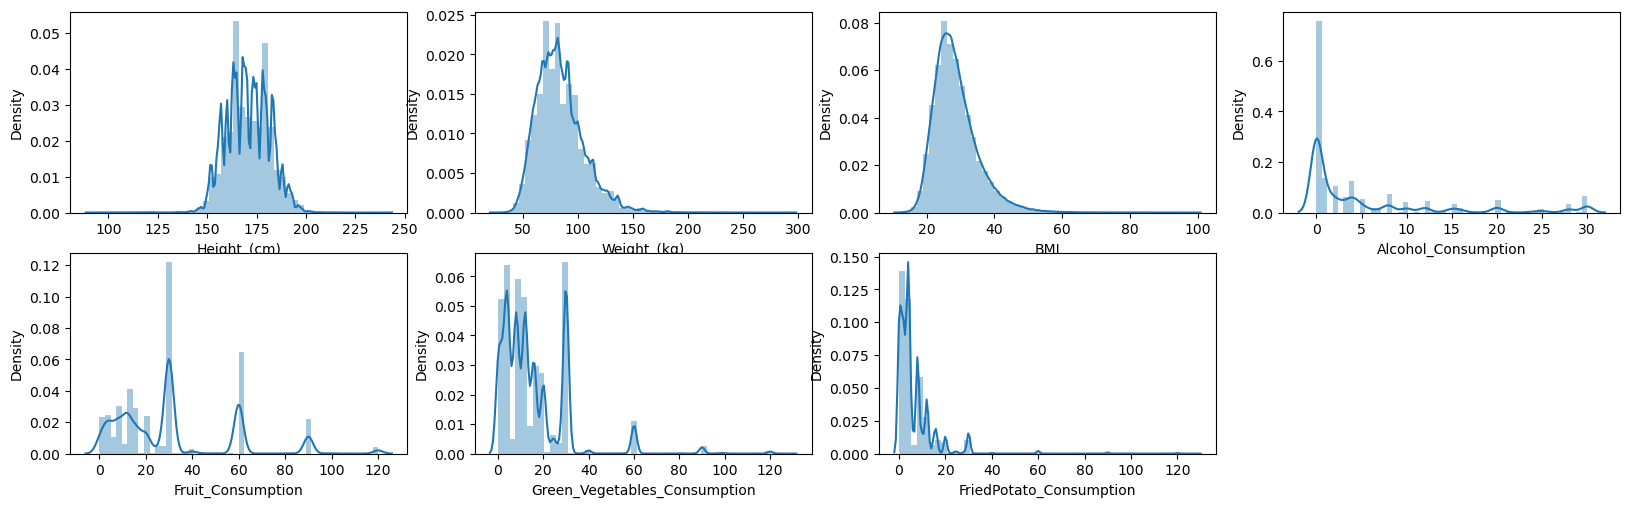

In [20]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(df.select_dtypes(include='number'),1):
    plt.subplot(4,4,i)
    sns.distplot(df[column])

### Skewness

In [28]:
for i in df.select_dtypes(include='number'):
    skewness=df[i].skew()
    print("The skewness of",i,"is",skewness)

The skewness of Height_(cm) is 0.015311196840733442
The skewness of Weight_(kg) is 1.0582036939962034
The skewness of BMI is 1.376619254276206
The skewness of Alcohol_Consumption is 1.8856221999937481
The skewness of Fruit_Consumption is 1.2484281380707503
The skewness of Green_Vegetables_Consumption is 2.4156076657372916
The skewness of FriedPotato_Consumption is 4.912349572075087


### Correlation and Heatmap

In [32]:
df.describe(include='object')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,7,5,2,2,2,2,2,4,2,5,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160186,33434,183590


In [33]:
df=df.drop(["General_Health","Checkup","Exercise","Heart_Disease","Skin_Cancer","Other_Cancer","Depression","Diabetes","Arthritis","Sex","Age_Category","Smoking_History",],axis=1)
df.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150,32.66,14.54,0,30,16,12
1,165,77.11,28.29,0,30,0,4
2,163,88.45,33.47,4,12,3,16
3,180,93.44,28.73,0,30,30,8
4,191,88.45,24.37,0,8,4,0


In [34]:
df.corr()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


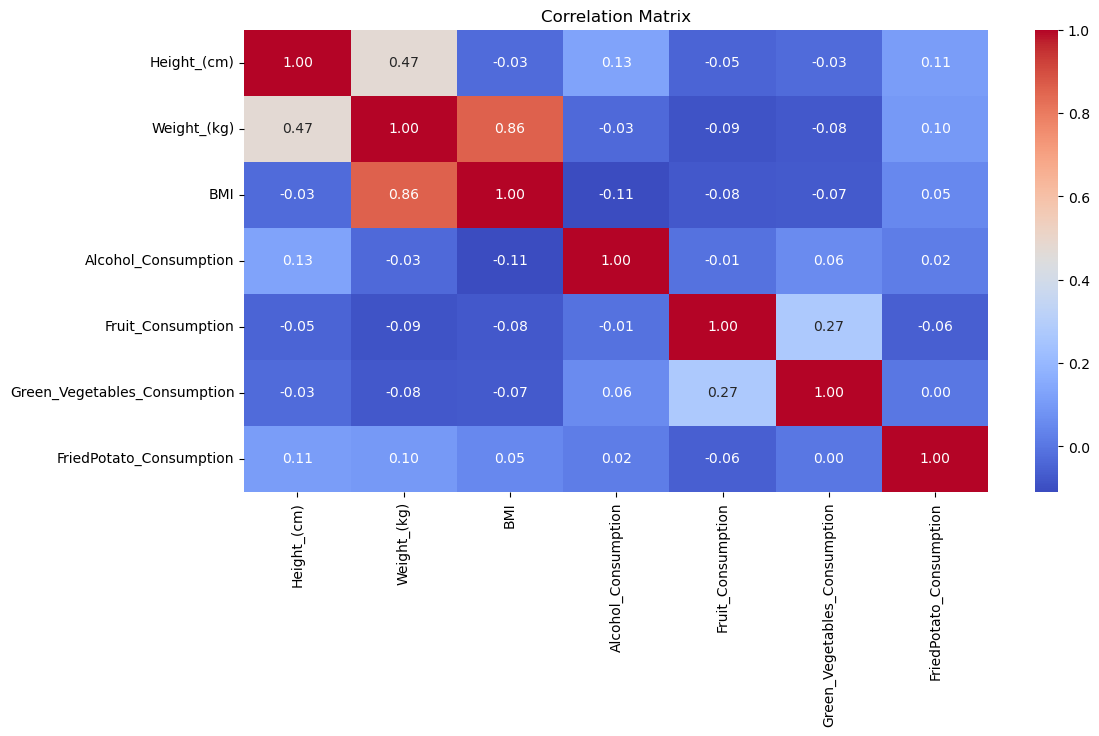

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Checking for Outliers

In [38]:
df.dtypes

Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [39]:
df.duplicated().sum()

29335

In [40]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Treatment of Outliers

In [43]:
q1=df.quantile(0.25)
q1

Height_(cm)                     163.00
Weight_(kg)                      68.04
BMI                              24.21
Alcohol_Consumption               0.00
Fruit_Consumption                12.00
Green_Vegetables_Consumption      4.00
FriedPotato_Consumption           2.00
Name: 0.25, dtype: float64

In [45]:
q3=df.quantile(0.75)
q3

Height_(cm)                     178.00
Weight_(kg)                      95.25
BMI                              31.85
Alcohol_Consumption               6.00
Fruit_Consumption                30.00
Green_Vegetables_Consumption     20.00
FriedPotato_Consumption           8.00
Name: 0.75, dtype: float64

In [46]:
IQR = q3-q1
IQR

Height_(cm)                     15.00
Weight_(kg)                     27.21
BMI                              7.64
Alcohol_Consumption              6.00
Fruit_Consumption               18.00
Green_Vegetables_Consumption    16.00
FriedPotato_Consumption          6.00
dtype: float64

In [47]:
high_out_n=q3.BMI+1.5*IQR.BMI
high_out_n

43.31

In [49]:
low_out_n=q1.BMI-1.5*IQR.BMI
low_out_n

12.75

In [50]:
high_out_p=q3.Alcohol_Consumption+1.5*IQR.Alcohol_Consumption
high_out_p

15.0

In [51]:
low_out_p=q1.Alcohol_Consumption-1.5*IQR.Alcohol_Consumption
low_out_p

-9.0

In [52]:
high_out_n=q3.Fruit_Consumption+1.5*IQR.Fruit_Consumption
high_out_n

57.0

In [53]:
low_out_n=q1.Fruit_Consumption-1.5*IQR.Fruit_Consumption
low_out_n

-15.0

In [54]:
high_out_n=q3.Green_Vegetables_Consumption+1.5*IQR.Green_Vegetables_Consumption	
high_out_n

44.0

In [55]:
low_out_n=q1.Green_Vegetables_Consumption-1.5*IQR.Green_Vegetables_Consumption
low_out_n

-20.0

In [56]:
high_out_n=q3.FriedPotato_Consumption+1.5*IQR.FriedPotato_Consumption	
high_out_n

17.0

In [57]:
low_out_n=q1.FriedPotato_Consumption-1.5*IQR.FriedPotato_Consumption
low_out_n

-7.0

### Capping

In [59]:
new_df = df.copy()
new_df['BMI']=np.where(new_df['BMI']>high_out_n,
                    high_out_n,
                    np.where(new_df['BMI']<low_out_n,
                    low_out_n,
                    new_df['BMI']
    )
)

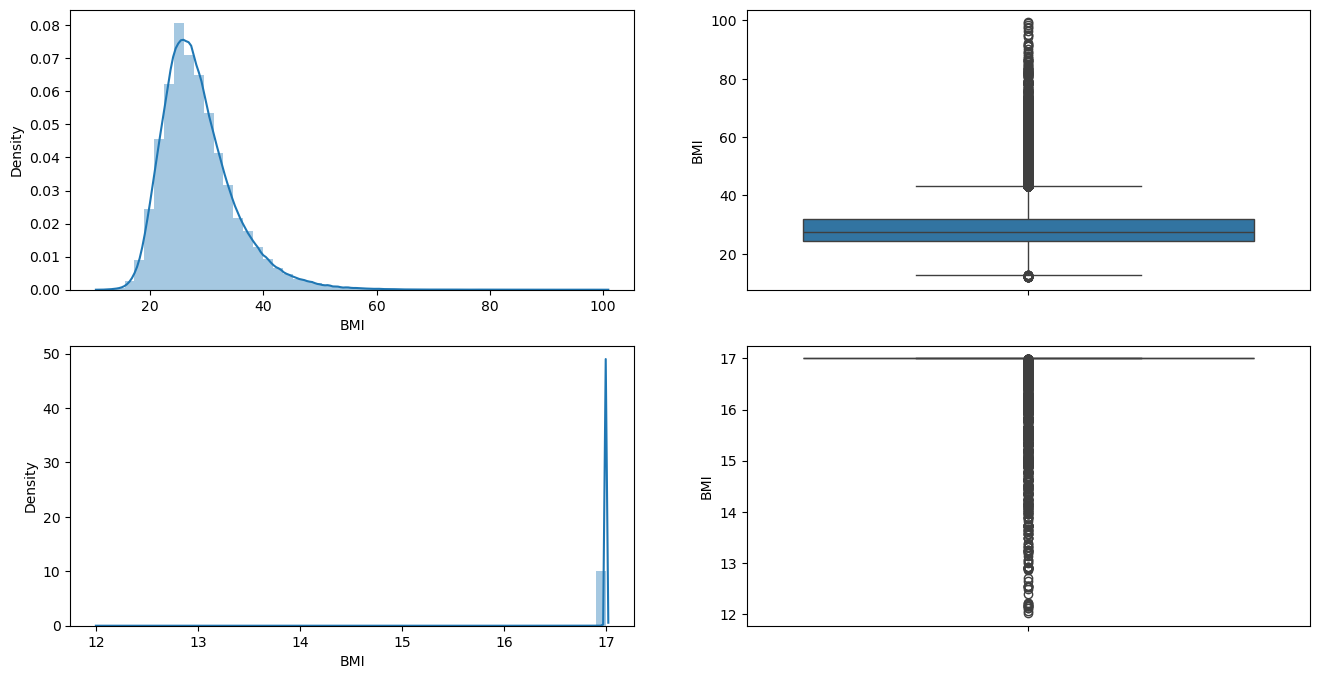

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['BMI'])

plt.subplot(2,2,2)
sns.boxplot(df['BMI'])

plt.subplot(2,2,3)
sns.distplot(new_df['BMI'])

plt.subplot(2,2,4)
sns.boxplot(new_df['BMI'])

plt.show()

In [61]:
new_df = df.copy()
new_df['Alcohol_Consumption']=np.where(new_df['Alcohol_Consumption']>high_out_n,
                    high_out_n,
                    np.where(new_df['Alcohol_Consumption']<low_out_n,
                    low_out_n,
                    new_df['Alcohol_Consumption']
    )
)

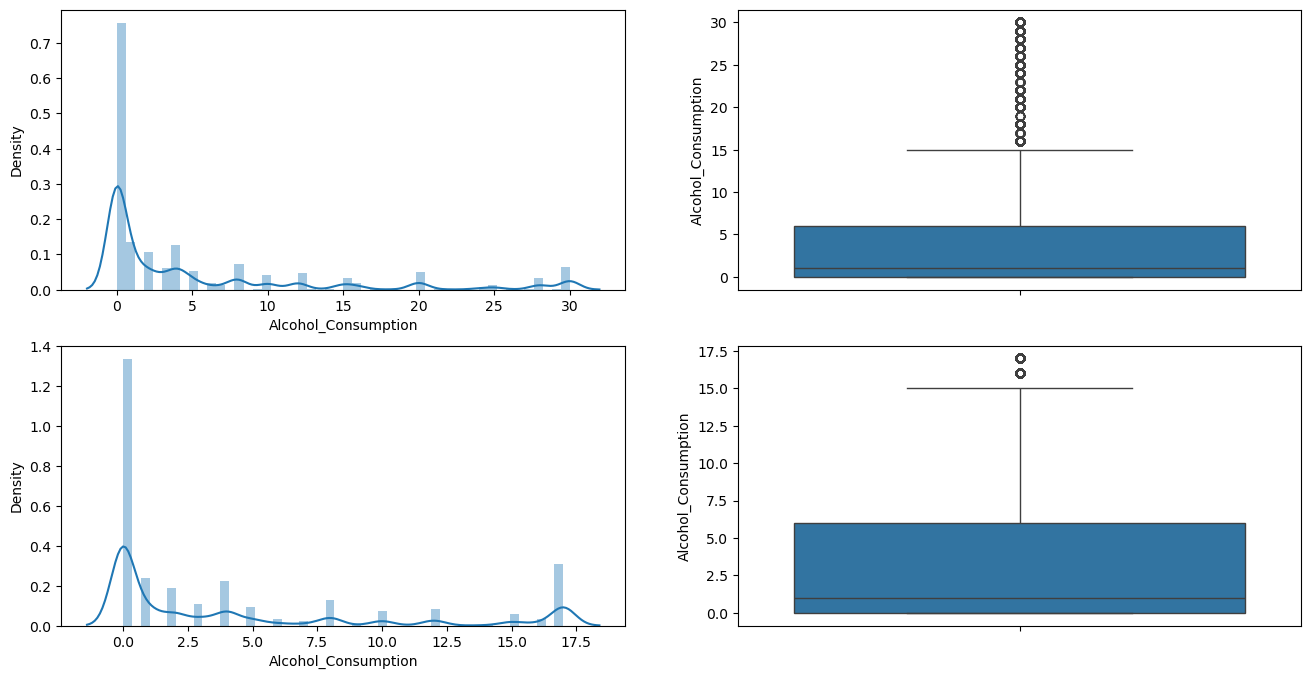

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Alcohol_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['Alcohol_Consumption'])

plt.subplot(2,2,3)
sns.distplot(new_df['Alcohol_Consumption'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Alcohol_Consumption'])

plt.show()

In [63]:
new_df = df.copy()
new_df['Fruit_Consumption']=np.where(new_df['Fruit_Consumption']>high_out_n,
                    high_out_n,
                    np.where(new_df['Fruit_Consumption']<low_out_n,
                    low_out_n,
                    new_df['Fruit_Consumption']
    )
)

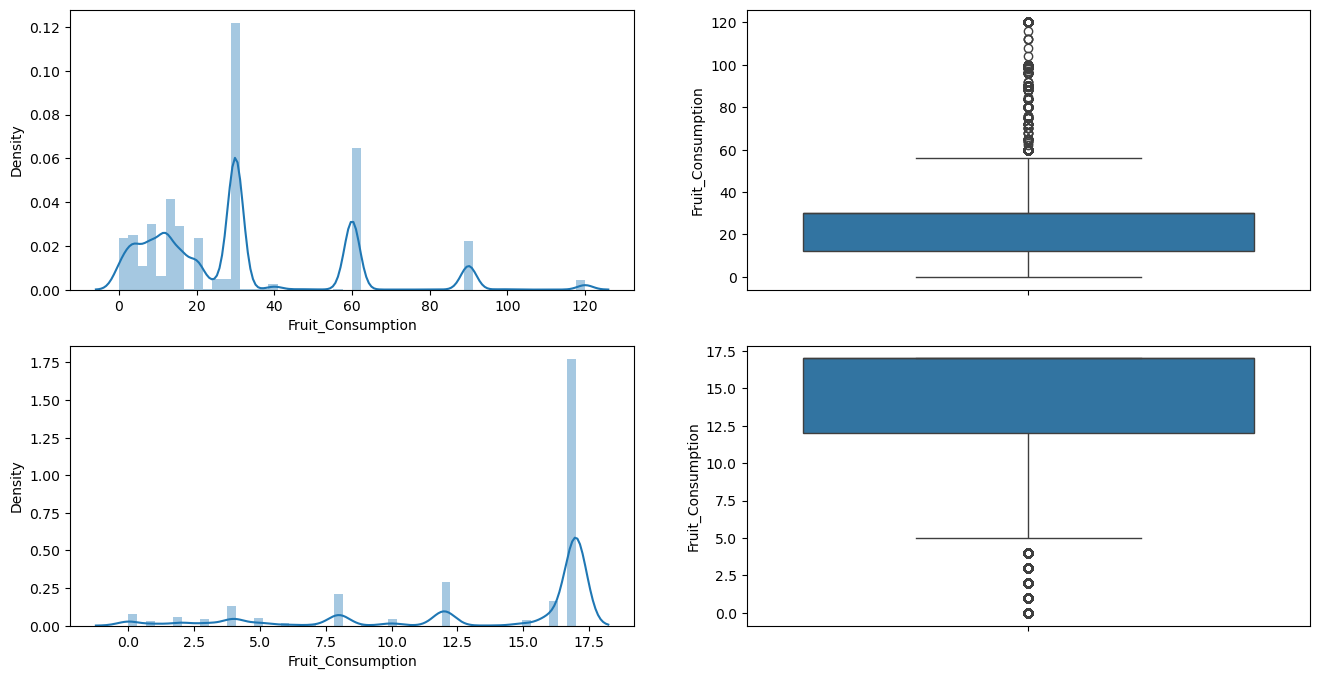

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fruit_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['Fruit_Consumption'])

plt.subplot(2,2,3)
sns.distplot(new_df['Fruit_Consumption'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Fruit_Consumption'])

plt.show()

In [66]:
new_df = df.copy()
new_df['Green_Vegetables_Consumption']=np.where(new_df['Green_Vegetables_Consumption']>high_out_n,
                    high_out_n,
                    np.where(new_df['Green_Vegetables_Consumption']<low_out_n,
                    low_out_n,
                    new_df['Green_Vegetables_Consumption']
    )
)

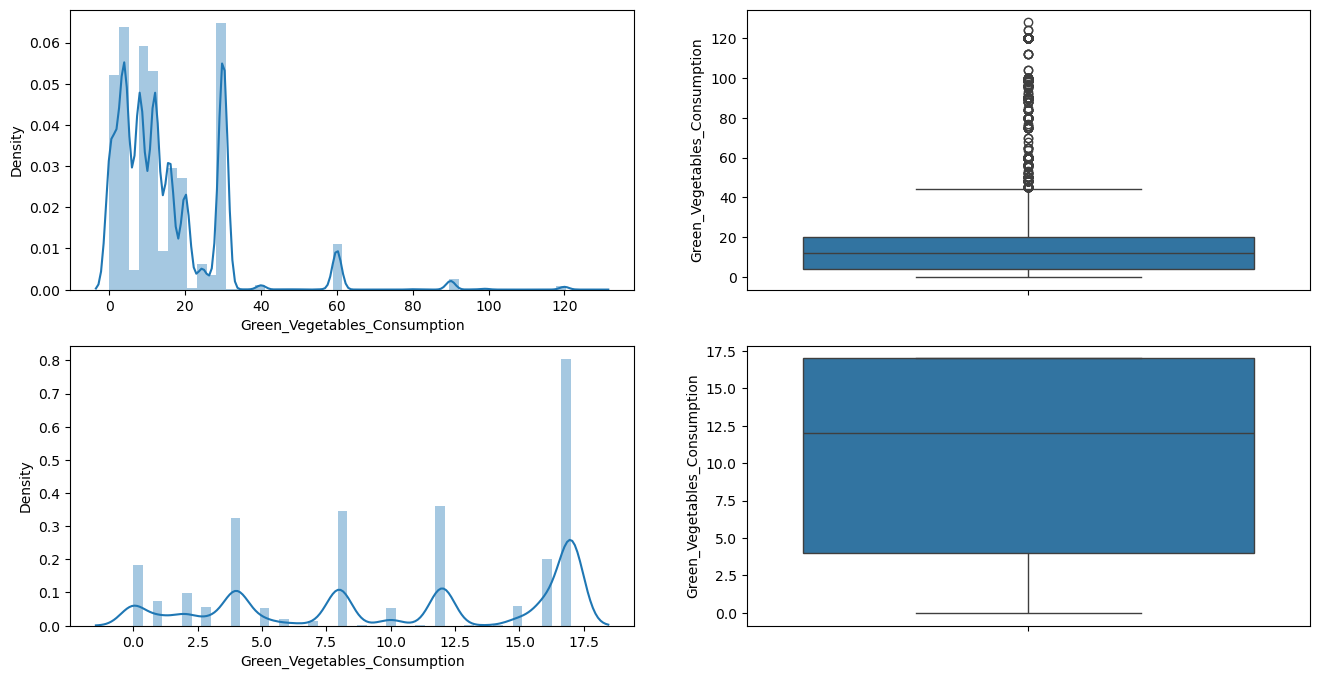

In [67]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Green_Vegetables_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['Green_Vegetables_Consumption'])

plt.subplot(2,2,3)
sns.distplot(new_df['Green_Vegetables_Consumption'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Green_Vegetables_Consumption'])

plt.show()

In [68]:
new_df = df.copy()
new_df['FriedPotato_Consumption']=np.where(new_df['FriedPotato_Consumption']>high_out_n,
                    high_out_n,
                    np.where(new_df['FriedPotato_Consumption']<low_out_n,
                    low_out_n,
                    new_df['FriedPotato_Consumption']
    )
)

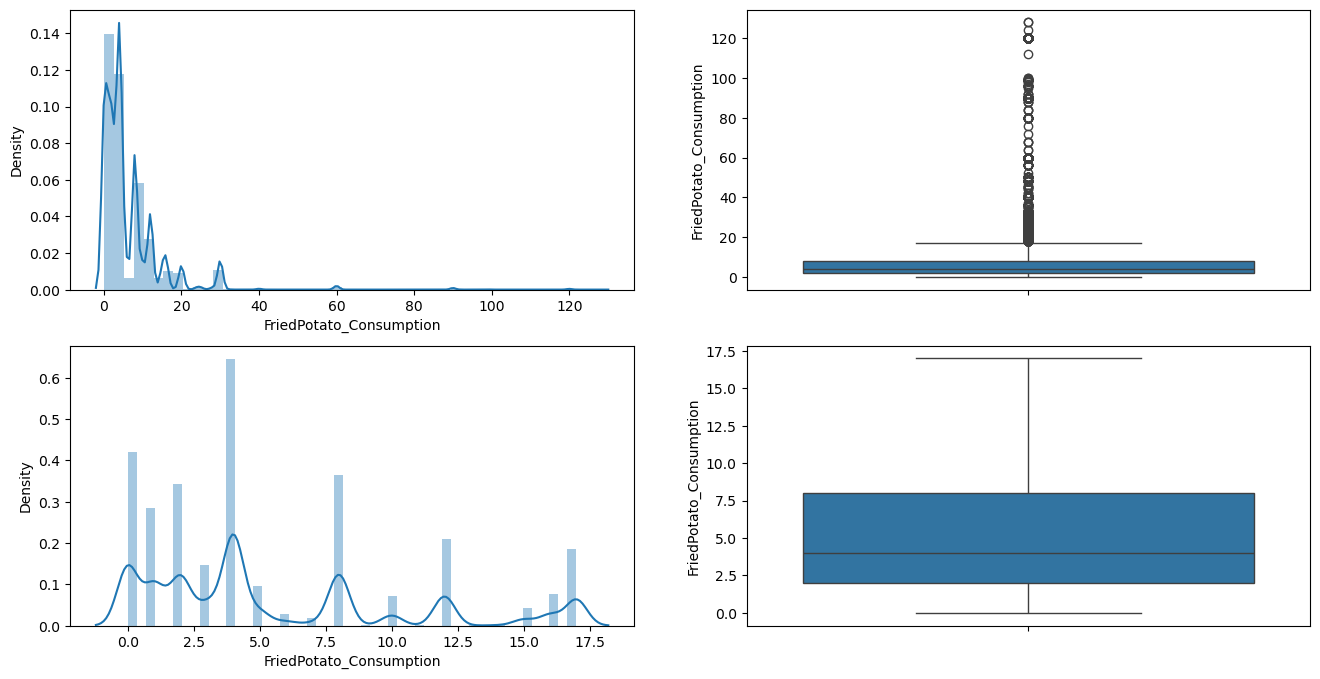

In [69]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['FriedPotato_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['FriedPotato_Consumption'])

plt.subplot(2,2,3)
sns.distplot(new_df['FriedPotato_Consumption'])

plt.subplot(2,2,4)
sns.boxplot(new_df['FriedPotato_Consumption'])

plt.show()

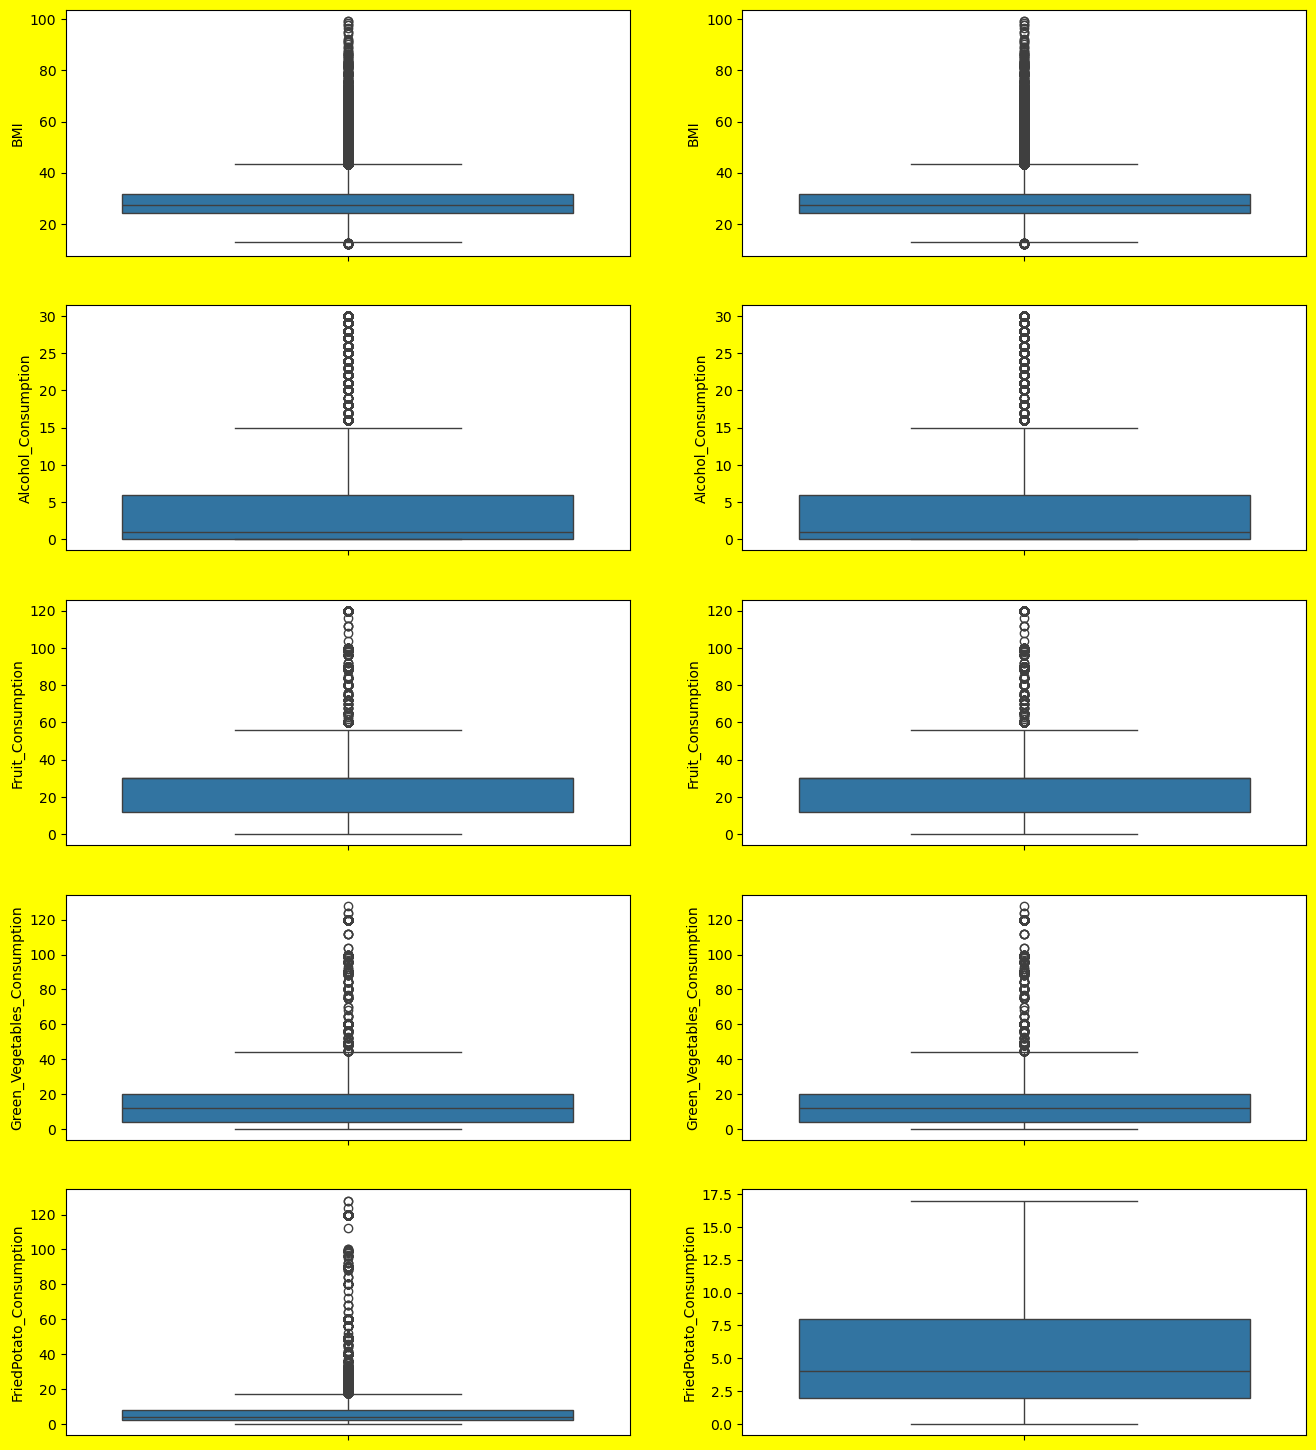

In [70]:
plt.figure(figsize=(16,30),facecolor="yellow")
plt.subplot(8,2,1)
sns.boxplot(df['BMI'])

plt.subplot(8,2,2)
sns.boxplot(new_df['BMI'])

plt.subplot(8,2,3)
sns.boxplot(df['Alcohol_Consumption'])

plt.subplot(8,2,4)
sns.boxplot(new_df['Alcohol_Consumption'])

plt.subplot(8,2,5)
sns.boxplot(df['Fruit_Consumption'])

plt.subplot(8,2,6)
sns.boxplot(new_df['Fruit_Consumption'])

plt.subplot(8,2,7)
sns.boxplot(df['Green_Vegetables_Consumption'])

plt.subplot(8,2,8)
sns.boxplot(new_df['Green_Vegetables_Consumption'])

plt.subplot(8,2,9)
sns.boxplot(df['FriedPotato_Consumption'])

plt.subplot(8,2,10)
sns.boxplot(new_df['FriedPotato_Consumption'])

plt.show()

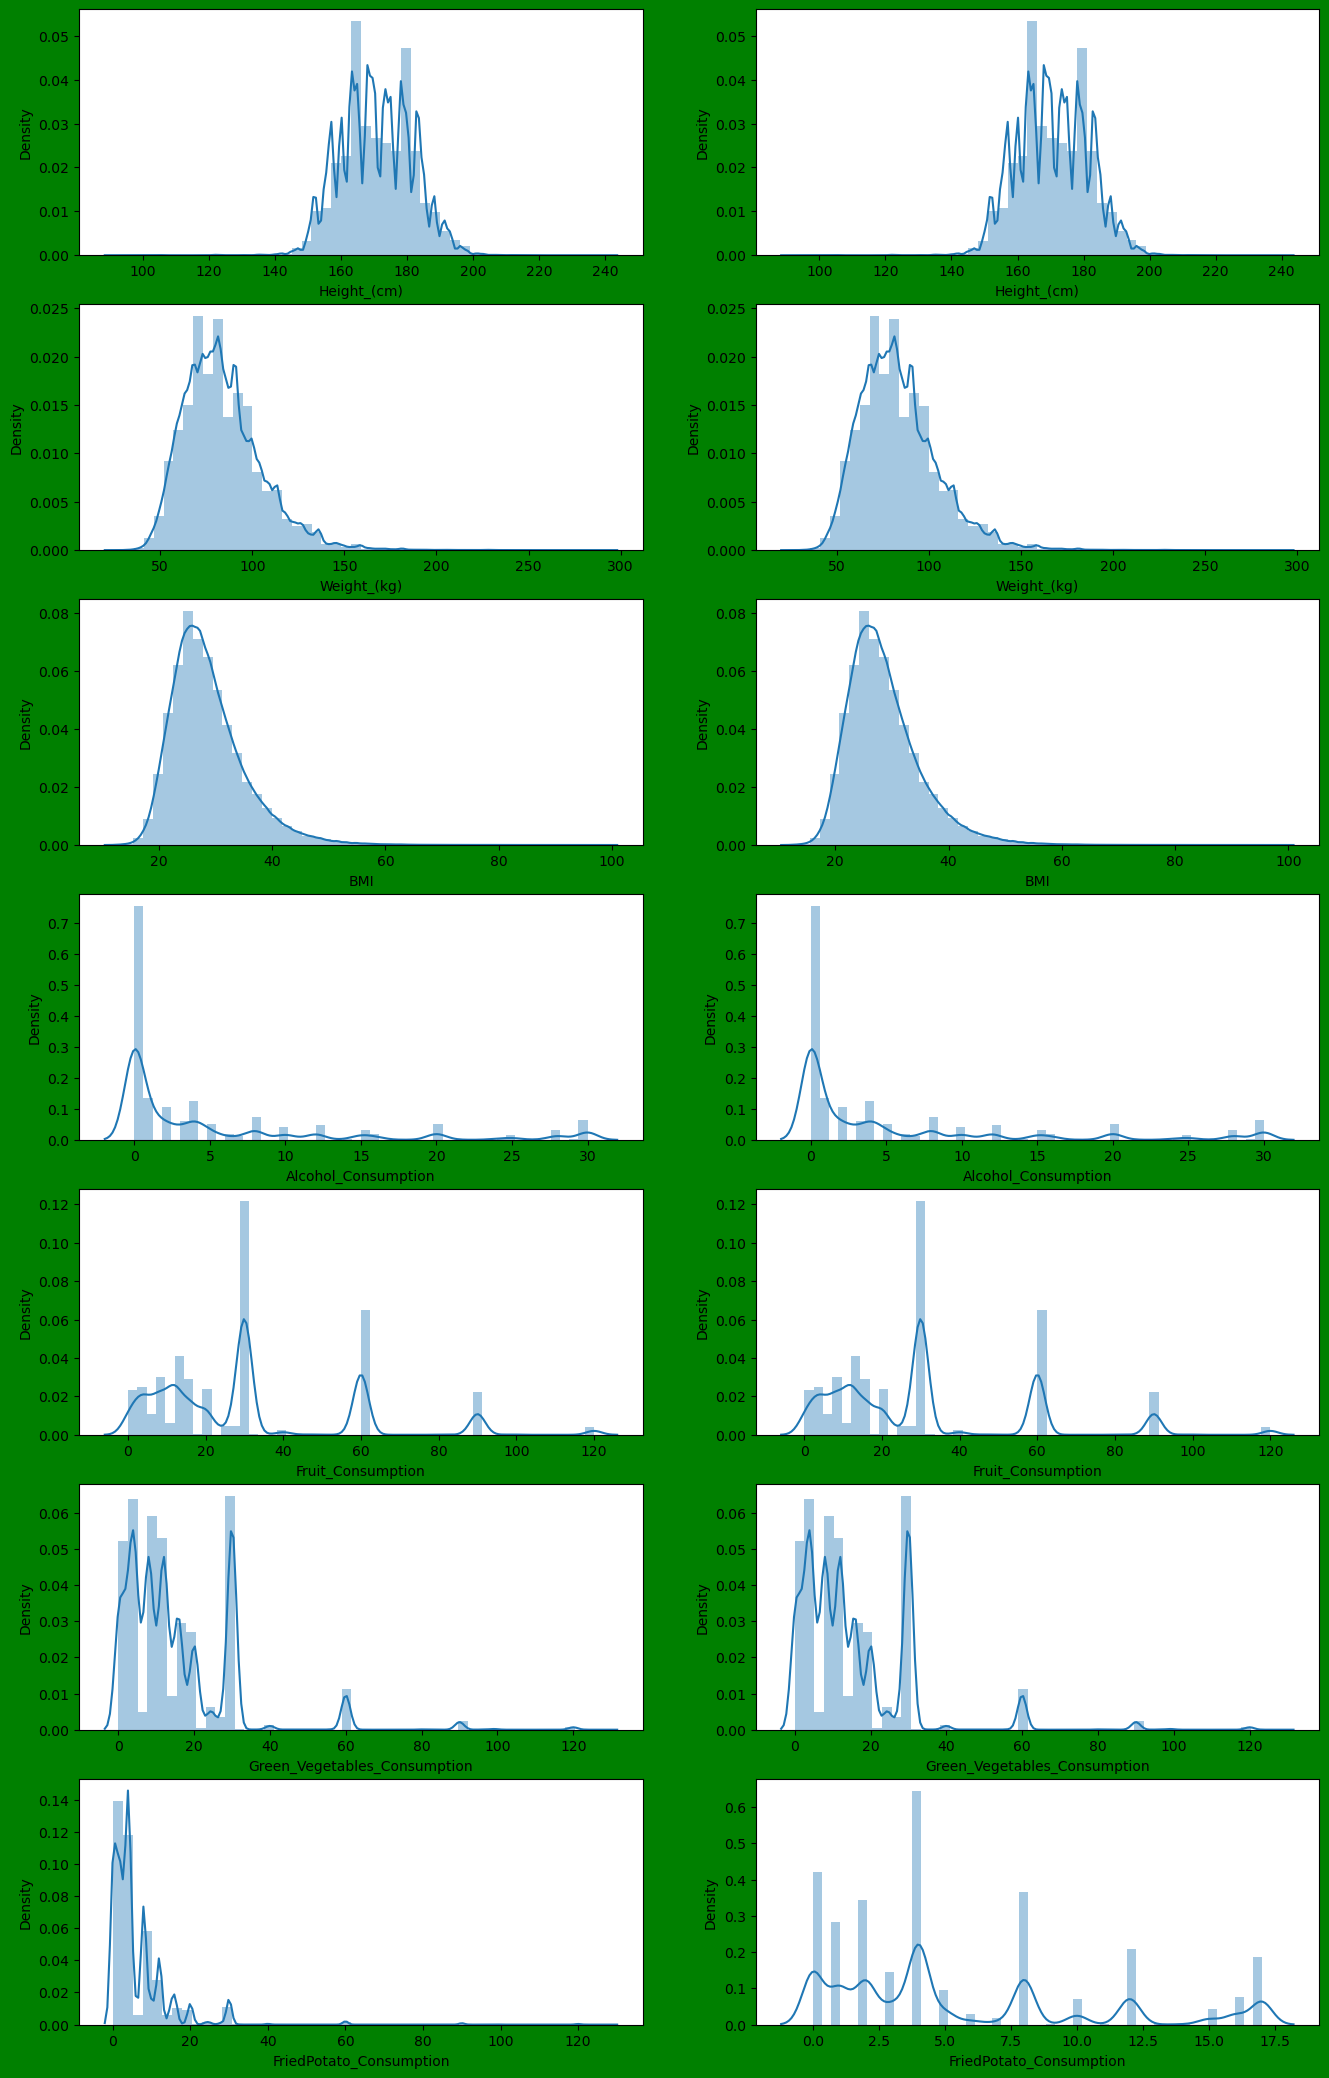

In [71]:
plt.figure(figsize=(16,30),facecolor="green")
plt.subplot(8,2,1)
sns.distplot(df['Height_(cm)'])

plt.subplot(8,2,2)
sns.distplot(new_df['Height_(cm)'])

plt.subplot(8,2,3)
sns.distplot(df['Weight_(kg)'])

plt.subplot(8,2,4)
sns.distplot(new_df['Weight_(kg)'])

plt.subplot(8,2,5)
sns.distplot(df['BMI'])

plt.subplot(8,2,6)
sns.distplot(new_df['BMI'])

plt.subplot(8,2,7)
sns.distplot(df['Alcohol_Consumption'])

plt.subplot(8,2,8)
sns.distplot(new_df['Alcohol_Consumption'])

plt.subplot(8,2,9)
sns.distplot(df['Fruit_Consumption'])

plt.subplot(8,2,10)
sns.distplot(new_df['Fruit_Consumption'])

plt.subplot(8,2,11)
sns.distplot(df['Green_Vegetables_Consumption'])

plt.subplot(8,2,12)
sns.distplot(new_df['Green_Vegetables_Consumption'])

plt.subplot(8,2,13)
sns.distplot(df['FriedPotato_Consumption'])

plt.subplot(8,2,14)
sns.distplot(new_df['FriedPotato_Consumption'])

plt.show()

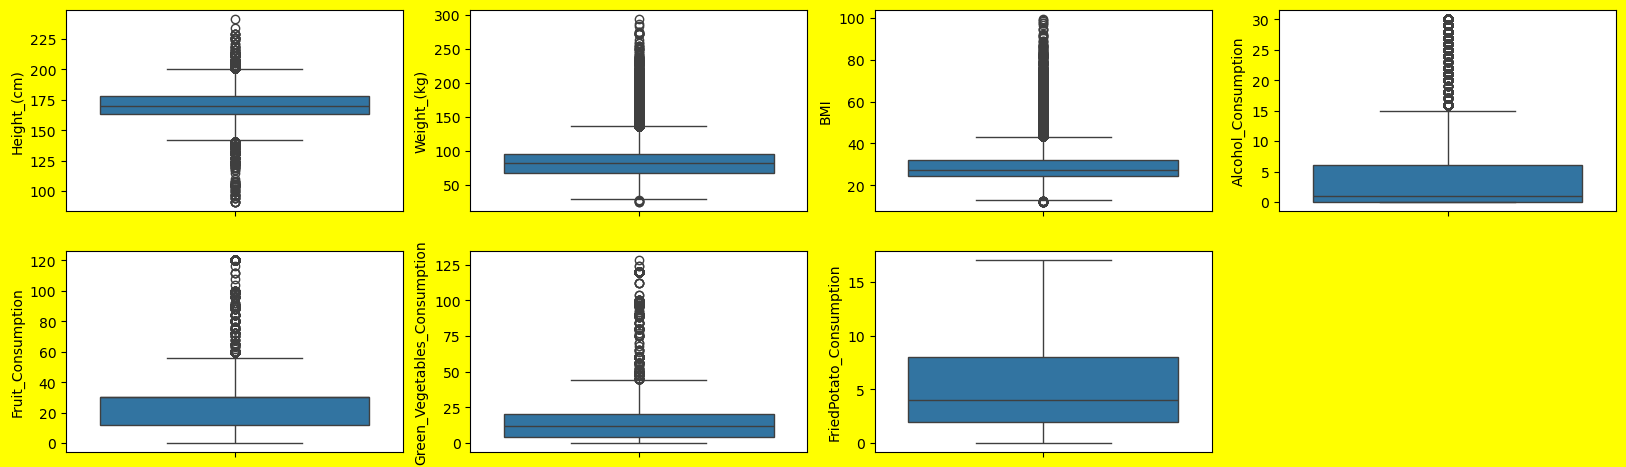

In [72]:
plt.figure(figsize=(20,12),facecolor="yellow")
for i, column in enumerate(new_df.select_dtypes(include='number'),1):
    plt.subplot(4,4,i)
    sns.boxplot(new_df[column])

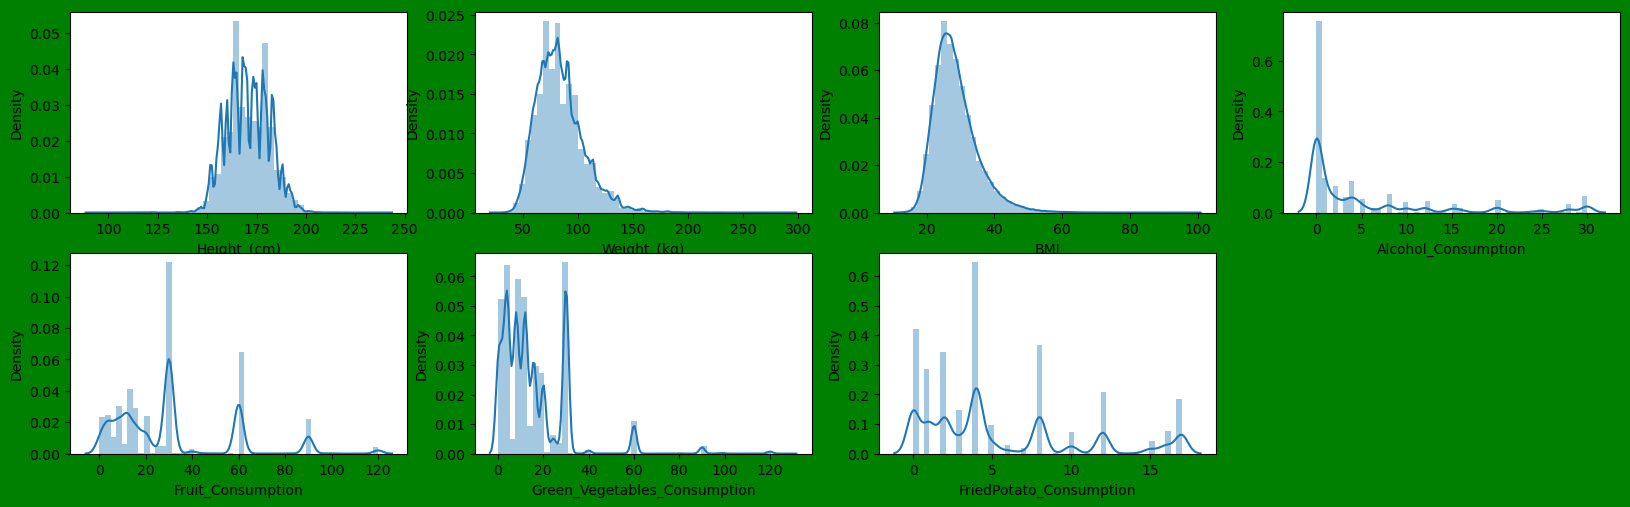

In [73]:
plt.figure(figsize=(20, 12),facecolor="green")
for i, column in enumerate(new_df.select_dtypes(include='number'),1):
    plt.subplot(4,4,i)
    sns.distplot(new_df[column])

In [74]:
for i in new_df.select_dtypes(include='number'):
    skewness=new_df[i].skew()
    print("The skewness of",i,"is",skewness)

The skewness of Height_(cm) is 0.015311196840733442
The skewness of Weight_(kg) is 1.0582036939962034
The skewness of BMI is 1.376619254276206
The skewness of Alcohol_Consumption is 1.8856221999937481
The skewness of Fruit_Consumption is 1.2484281380707503
The skewness of Green_Vegetables_Consumption is 2.4156076657372916
The skewness of FriedPotato_Consumption is 0.9982643589988301


## Encoding

### Binary Encoder

In [77]:
from category_encoders import BinaryEncoder

In [78]:
bi_enc = BinaryEncoder()

In [79]:
df_1=pd.read_csv('CVD_cleaned.csv')
df_1.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [80]:
df_1_bincode=bi_enc.fit_transform(df_1[['Heart_Disease','Age_Category']])
df_1_bincode

,Heart_Disease_0,Heart_Disease_1,Age_Category_0,Age_Category_1,Age_Category_2,Age_Category_3
0,0,1,0,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,1,0
3,1,0,0,0,1,1
4,0,1,0,1,0,0
...,...,...,...,...,...,...
308849,0,1,1,1,0,1
308850,0,1,0,1,0,1
308851,0,1,1,0,0,1
308852,0,1,0,1,0,1


In [81]:
df_1conc=pd.concat([df_1,df_1_bincode],axis=1)
df_1conc.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease_0,Heart_Disease_1,Age_Category_0,Age_Category_1,Age_Category_2,Age_Category_3
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,0,30,16,12,0,1,0,0,0,1
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,0,30,0,4,1,0,0,0,0,1
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,4,12,3,16,0,1,0,0,1,0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,0,30,30,8,1,0,0,0,1,1
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,0,8,4,0,0,1,0,1,0,0


In [82]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
df_1=df_1.drop(["General_Health","Checkup","Exercise","Heart_Disease","Skin_Cancer","Other_Cancer","Depression","Diabetes","Arthritis","Sex","Age_Category","Smoking_History"],axis=1)
df_1.head()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150,32.66,14.54,0,30,16,12
1,165,77.11,28.29,0,30,0,4
2,163,88.45,33.47,4,12,3,16
3,180,93.44,28.73,0,30,30,8
4,191,88.45,24.37,0,8,4,0


In [84]:
print(df_1.columns)

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')


In [85]:
y = df_1['BMI']
y

0         14.54
1         28.29
2         33.47
3         28.73
4         24.37
          ...  
308849    29.05
308850    21.48
308851    24.69
308852    23.73
308853    31.71
Name: BMI, Length: 308854, dtype: float64

In [86]:
x = df_1.drop('BMI',axis=1)
x

,Height_(cm),Weight_(kg),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150,32.66,0,30,16,12
1,165,77.11,0,30,0,4
2,163,88.45,4,12,3,16
3,180,93.44,0,30,30,8
4,191,88.45,0,8,4,0
...,...,...,...,...,...,...
308849,168,81.65,4,30,8,0
308850,180,69.85,8,15,60,4
308851,157,61.23,4,40,8,4
308852,183,79.38,3,30,12,0


## Scaler

### Standard Scaler

In [89]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[-1.93424954, -2.38617985, -0.62152705,  0.00662492,  0.05959713,
         0.66450236],
       [-0.5268572 , -0.30354689, -0.62152705,  0.00662492, -1.01234246,
        -0.26757915],
       [-0.71450951,  0.22777049, -0.13370725, -0.71697295, -0.81135379,
         1.13054312],
       ...,
       [-1.27746645, -1.04757864, -0.13370725,  0.40862374, -0.47637267,
        -0.26757915],
       [ 1.16201362, -0.19718971, -0.2556622 ,  0.00662492, -0.20838777,
        -0.73361991],
       [-0.99598798, -0.11238508, -0.4995721 , -0.99837212, -0.20838777,
        -0.61710972]])

In [90]:
Df=pd.DataFrame(x_scaler)
Df

,0,1,2,3,4,5
0,-1.934250,-2.386180,-0.621527,0.006625,0.059597,0.664502
1,-0.526857,-0.303547,-0.621527,0.006625,-1.012342,-0.267579
2,-0.714510,0.227770,-0.133707,-0.716973,-0.811354,1.130543
3,0.880535,0.461569,-0.621527,0.006625,0.997544,0.198462
4,1.912623,0.227770,-0.621527,-0.877772,-0.744358,-0.733620
...,...,...,...,...,...,...
308849,-0.245379,-0.090833,-0.133707,0.006625,-0.476373,-0.733620
308850,0.880535,-0.643702,0.354113,-0.596373,3.007431,-0.267579
308851,-1.277466,-1.047579,-0.133707,0.408624,-0.476373,-0.267579
308852,1.162014,-0.197190,-0.255662,0.006625,-0.208388,-0.733620


### VIF (Variance Inflation Factor) 

In [92]:
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [
        variance_inflation_factor(dataframe.values, i) 
        for i in range(dataframe.shape[1])
    ]
    return vif_data

In [93]:
scaler = StandardScaler()
numerical_columns = ['Height_(cm)', 'Weight_(kg)'] 
x_scaler = pd.DataFrame(scaler.fit_transform(df_1[numerical_columns]), columns = numerical_columns)

x_scaler = pd.DataFrame(scaler.fit_transform(df_1[numerical_columns]), columns = numerical_columns)
vif_dataframe = calculate_vif(x_scaler)
print("VIF Results:")
print(vif_dataframe)

VIF Results:
       Feature       VIF
0  Height_(cm)  1.286935
1  Weight_(kg)  1.286935


In [94]:
df_1.corr()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


<Axes: >

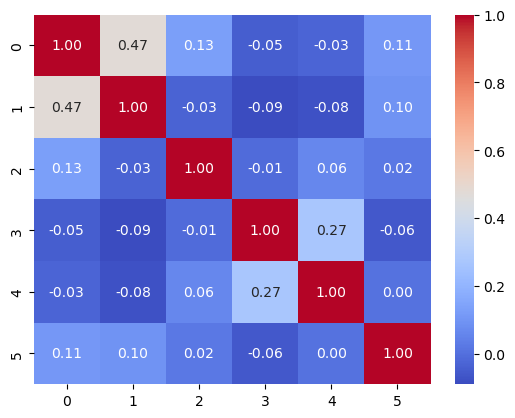

In [95]:
sns.heatmap(Df.corr( ),annot=True, cmap='coolwarm', fmt=".2f")

### Train_Test_Split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=22)
X_train

,Height_(cm),Weight_(kg),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
307658,170,90.72,0,4,8,4
53792,183,108.86,0,30,30,20
123641,183,88.45,16,0,2,1
93916,173,65.77,1,97,30,0
128832,157,117.93,0,30,10,3
...,...,...,...,...,...,...
219638,157,77.11,0,30,10,10
120166,183,73.48,15,30,4,4
24932,163,54.43,0,60,8,0
162752,175,113.40,0,90,25,10


In [99]:
X_test

,Height_(cm),Weight_(kg),Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
49152,160,49.90,1,90,90,0
84838,168,58.97,10,12,8,12
95282,168,131.54,0,4,4,4
26982,180,106.59,8,30,16,12
239809,157,58.97,1,60,8,8
...,...,...,...,...,...,...
252810,183,72.57,0,12,0,1
175549,160,68.04,3,15,10,4
267742,170,68.04,0,20,12,0
160846,185,99.79,20,3,0,20


In [100]:
Y_train

307658    31.32
53792     32.55
123641    26.45
93916     22.05
128832    47.55
          ...  
219638    31.09
120166    21.97
24932     20.60
162752    36.92
252036    26.37
Name: BMI, Length: 216197, dtype: float64

In [101]:
Y_test

49152     19.49
84838     20.98
95282     46.81
26982     32.78
239809    23.78
          ...  
252810    21.70
175549    26.57
267742    23.49
160846    29.03
291572    56.38
Name: BMI, Length: 92657, dtype: float64

<Axes: xlabel='Height_(cm)', ylabel='Density'>

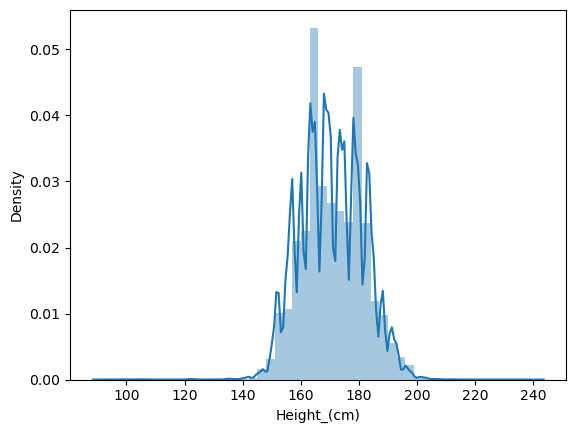

In [102]:
sns.distplot(x['Height_(cm)'])

In [103]:
x["Height_(cm)"].skew()

0.015311196840733442

In [104]:
log_dis = np.log(x['Height_(cm)'])

<Axes: xlabel='Height_(cm)', ylabel='Density'>

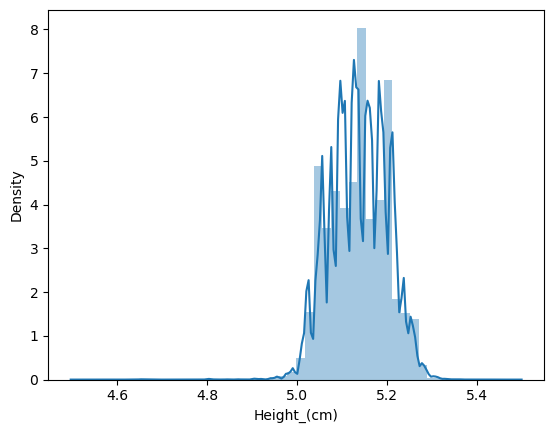

In [105]:
sns.distplot(log_dis)

In [108]:
log_dis.skew()

-0.20092361962325223

In [112]:
df_1.isnull().sum()

Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor,plot_tree

## Regression

### Linear Regression

In [134]:
ln = LinearRegression()

In [135]:
ln.fit(X_train, Y_train)

LinearRegression()

In [136]:
y_pred=ln.predict(X_test)
y_pred

array([20.61345601, 21.08268105, 45.97625861, ..., 23.50150711,
       29.29531511, 56.18521446])

In [137]:
mse = mean_squared_error(Y_test, y_pred)
mse

0.8144191009111283

In [138]:
r2 = r2_score(Y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.98092955938758


## KNeighborsRegressor(knn)

In [140]:
knn = KNeighborsRegressor(n_neighbors=3)

In [141]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [142]:
y_pred = knn.predict(X_test)

### Mean Squared Error And r2 Score

In [144]:
mse = mean_squared_error(Y_test, y_pred)
mse

0.43174527954354947

In [145]:
r2 = r2_score(Y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9898902509727281


## Random Forest Regressor

In [147]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)

In [148]:
clf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [149]:
y_pred = clf.predict(X_test)

In [150]:
mse = mean_squared_error(Y_test, y_pred)
mse

0.013383944797174805

In [151]:
r2 = r2_score(Y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.999686601500224


In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [156]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, Y_train)

In [ ]:
print(grid_search.best_params_)